In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **LIBRARIES**

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import random
from random import sample
import time
import datetime
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import seaborn as sns


# WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
# from gensim.models import Word2Vec
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix

# SVM
from sklearn.svm import SVC

# NB
from sklearn.naive_bayes import MultinomialNB

# Transformers / BERT
import torch
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **MERGING DATA**

In [ ]:
# df_merged = pd.read_csv('/content/drive/MyDrive/SKRIPSI/dataset/cleaned/df_merged.csv')
df_merged = pd.read_csv('/content/df_merged.csv')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9781 entries, 0 to 9780
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           9781 non-null   object
 1   sentiment      9781 non-null   int64 
 2   original_text  9781 non-null   object
dtypes: int64(1), object(2)
memory usage: 229.4+ KB


In [ ]:
df_merged.tail()

,text,sentiment,original_text
9776,semangat polisi kapok tangkap usak situ tangka...,1,"semangat para polisi, jangan pernah kapok untu..."
9777,semangat polisi republik indonesia ciduk anark...,1,semangat Polisi Republik Indonesia-diciduk par...
9778,demo rusuh sebentar sapu allah desember biar b...,1,demo lagi rusuh lagi sudah sebentar disapu sam...
9779,gugup nyebut tuju,0,jangan gugup nyebut tujuan masa
9780,aparat bikin ricuh,0,aparat yang bikin ricuh


# **EDA**

## Sentiment Result

In [ ]:
# sentiment result df_merged_cut
sizes = df_merged['sentiment'].value_counts()
print(sizes)

sentiment
1    3933
0    3247
Name: count, dtype: int64


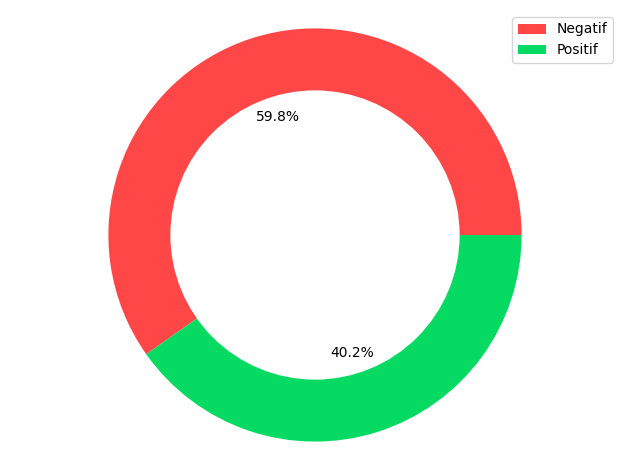

In [ ]:
labels = ['Negatif', 'Positif']
sizes = df_merged['sentiment'].value_counts()
colors = ['#ff4747', '#07da63']

fig, ax = plt.subplots()
ax.pie(sizes, colors=colors, autopct='%1.1f%%')
plt.legend(labels, loc=1)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
sizes

0    5848
1    3933
Name: sentiment, dtype: int64

## Frequent Words

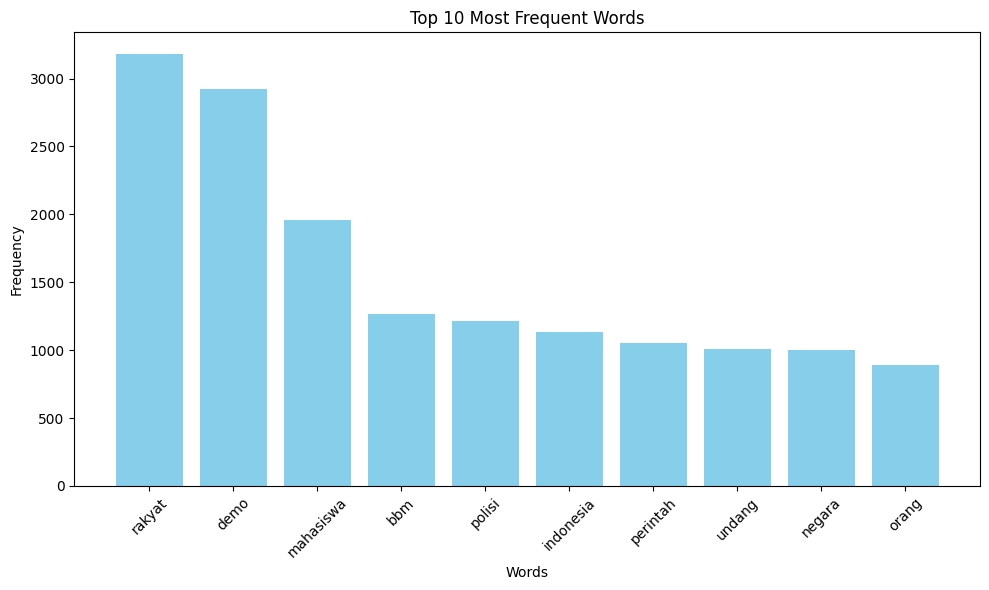

In [ ]:
all_words = ' '.join(df_merged['text'])
tokens = word_tokenize(all_words)

word_counts = Counter(tokens) # ini

most_common_words = word_counts.most_common(10)

words = [word[0] for word in most_common_words]
counts = [word[1] for word in most_common_words]

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_frequent = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
df_frequent = df_frequent.sort_values(by='count', ascending=False)
df_frequent.head(50)

,word,count
15,rakyat,3181
0,demo,2922
121,mahasiswa,1959
1,bbm,1265
259,polisi,1213
78,indonesia,1131
160,perintah,1050
737,undang,1010
8,negara,1004
11,orang,891


## Word Cloud

### General

In [ ]:
!git clone https://github.com/amueller/word_cloud.git
!cd word_cloud
# !pip install .

Cloning into 'word_cloud'...
remote: Enumerating objects: 6731, done.
remote: Counting objects: 100% (1001/1001), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 6731 (delta 849), reused 856 (delta 798), pack-reused 5730
Receiving objects: 100% (6731/6731), 117.00 MiB | 35.67 MiB/s, done.
Resolving deltas: 100% (3995/3995), done.


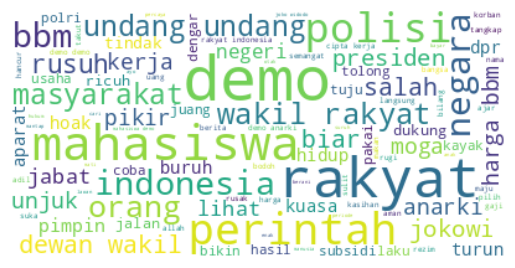

In [ ]:
text = ' '.join(df_merged['text'])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# wordcloud.to_file("img/word_cloud_general.png")

### Positive

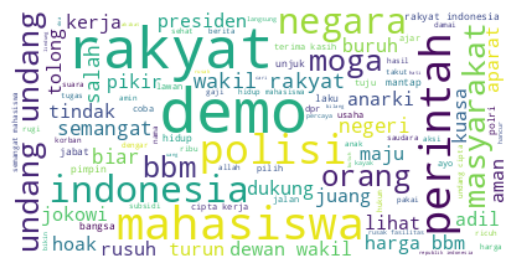

In [ ]:
positive_text = ' '.join(df_merged[df_merged['sentiment'] == 1]['text'])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
pos_text = df_merged[df_merged['sentiment'] == 1]
all_words = ' '.join(pos_text['text'])
tokens = word_tokenize(all_words)
word_counts = Counter(tokens)
df_frequent_positive = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

df_frequent_positive = df_frequent_positive.sort_values(by='count', ascending=False)
pd.set_option('display.max_rows', 100)
df_frequent_positive.head(100)

,word,count
54,rakyat,1332
68,demo,1065
29,mahasiswa,921
154,indonesia,532
36,bbm,491
177,polisi,481
589,undang,449
127,perintah,430
41,negara,366
76,moga,331


In [ ]:
pd.set_option('display.max_colwidth', None)
pos_text.sample(5)

,text,sentiment,original_text
4650,om bus hukum tingkat sejahtera rakyatom bus hukum untung usaha kelas atasemang usaha untung usaha karyawanburuhbukan hak buruhtp buruh tunggu bos nyaklw bos buruh apga jalan om bus hukum sejahtera rakyattidak kompromi murah harga produksiemang undang undang manis bungkus cipta kerjaburuh indonesia paksa mesin pekerjaini citaquot rakyat,1,EMANG OM NI BUS LAW BISA MENINGKAT KAN KESEJAHTERAAN RAKYAT??<br>OM NI BUS LAW HANYA MENGUNTUNGKAN PENGUSAHA KELAS MNENGAH KE ATAS<br>EMANG ADA PNGUSAHA YG MAU BERBAGI KE UNTUNGAN PRUSAHAAN NYA DNGAN KARYAWAN/BURUH??<br>BUKAN HAK YG DI DAPAT BURUH<br>TP BURUH HANYA MNUNGGU KBAIKAN DRI BOS NYA<br>KLW BOS NYA GA BAIK BURUH DAPAT AP??<br>GA AKAN JALAN OM NI BUS LAW INI UNTUK MENSEJAHTERAKAN RAKYAT<br>TIDAK ADA KOMPROMI DEMI MURAHNYA HARGA PRODUKSI<br>EMANG UU NYA TERLIHAT MANIS DI BUNGKUS DNGAN KATA <b>CIPTA KERJA</b><br>BURUH INDONESIA AKAN DI PAKSA JADI MESIN PEKERJA<br>INI BUKAN CITA&quot; RAKYAT
2261,subsidi bbm biar rakyat mandiri ayo saudara saudara henti bayar pajak biar perintah mandiri,1,Subsidi bbm biar rakyat mandiri ayo saudara saudara kita stop membayar pajak biar pemerintah mandiri
5040,pimpin pimpin sadarcontoh sifat almsoehartoketika mahasiswapelajar buruh rakyat percaya demgan pemerintahlangsung almsoeharto mundur hormatkarena pa harto korban jatuh banyakitu sikap negarawan santun patut contohsemoga kawan kawan demo sehat lindung allah swt,1,Sudah seperti ini pemimpin2 masih tidak sadar...<br>Contoh lah sifat alm.Soeharto...<br>Ketika mahasiswa..pelajar dan buruh serta rakyat sudah tidak percaya demgan pemerintah...<br>Langsung Alm.Soeharto mundur dengan hormat...<br><br>Karena pa harto tidak ingin korban jatuh lebih banyak...<br><br>Itu baru sikap negarawan yang santun dan patut di contoh...<br><br>Semoga kawan kawan yg demo sehat dan di lindungi oleh ALLAH SWT...
876,mahasiswa mantap juang mantap rakyat indonesia bangkit,1,Mahasiswa mantap pejuangan nya mantap rakyat indonesia bangkit
8000,hidup mahasiswa,1,Hidup mahasiswa


In [ ]:
# wordcloud.to_file("word_cloud_positive.png")

### Negative

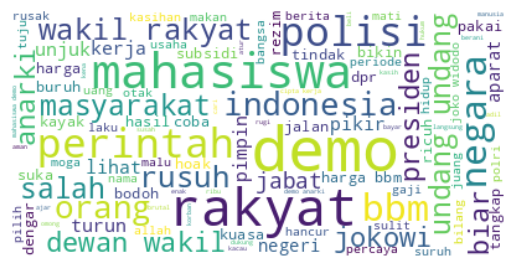

In [ ]:
negative_text = ' '.join(df_merged[df_merged['sentiment'] == 0]['text'])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
neg_text = df_merged[df_merged['sentiment'] == 0]
all_words = ' '.join(neg_text['text'])
tokens = word_tokenize(all_words)
word_counts = Counter(tokens)
df_frequent_negative = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

df_frequent_negative = df_frequent_negative.sort_values(by='count', ascending=False)
pd.set_option('display.max_rows', 100)
df_frequent_negative.head(100)

,word,count
0,demo,1857
15,rakyat,1849
102,mahasiswa,1038
1,bbm,774
158,polisi,732
8,negara,638
134,perintah,620
78,indonesia,599
11,orang,575
499,undang,561


In [ ]:
neg_text.sample(5)

,text,sentiment,original_text
5899,mahasiswa bodoh bukti omnibus hukum sengsara rakyat uu jalan asumsi tindas rakyat,0,Mahasiswa bodoh banget sih? Apa buktinya omnibus law menyengsarakan rakyat? <br>UUnya saja belum dijalankan.. Kok sudah berasumsi menindas rakyat??
2586,pancasila isi butir butir uud tinggal simbol laksana perintah manis bibir laksana omong kosong,0,Pancasila dan isi butir butir UUD 45 hanya tinggal simbol dan tidak pernah dilaksakan oleh pemerintah.manis dibibir saja tapi pelaksanaan nya omong kosong.
3375,ahok mahasiswa mati mati percaya,0,"Ingat kata Ahok ?<br>Mahasiswa mau mati Matian pun gak ada gunanya, percaya deh 😂😂😂"
6256,rakyat tindas muas konglomerat nama cinta nkri pancasila,0,"Rakyat trs di tindas demi memuaskan para konglomerat, apakah ini yg dinamakan cinta NKRI, pancasila."
5012,berani dewan wakil rakyat bikin undang undang hukum pancung korupsi,0,Berani ga dede pepe eer bikin UU Hukum pancung buat yg kerupsi?


In [ ]:
# wordcloud.to_file("word_cloud_negative.png")

# **MODELLING**

In [ ]:
df_merged = pd.read_csv('/content/df_merged_cut.csv')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7180 entries, 0 to 7179
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           7180 non-null   object
 1   sentiment      7180 non-null   int64 
 2   original_text  7180 non-null   object
dtypes: int64(1), object(2)
memory usage: 168.4+ KB


## SVM

### TF-IDF +1

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

count_vectorizer = CountVectorizer()
text_counts = count_vectorizer.fit_transform(df_merged['text'])

tf_idf = TfidfTransformer()
text_tfidf = tf_idf.fit_transform(text_counts)

In [ ]:
test1 = text_tfidf
print(test1)

  (0, 7374)	0.2978179287887266
  (0, 7256)	0.21861742618283392
  (0, 7131)	0.2364598663747413
  (0, 6938)	0.1365437564081231
  (0, 6075)	0.21861742618283392
  (0, 5932)	0.2364598663747413
  (0, 5524)	0.1882774322119575
  (0, 5510)	0.3022974833003638
  (0, 5267)	0.3494703292424236
  (0, 5168)	0.19273100740281754
  (0, 4928)	0.19257760481311925
  (0, 2939)	0.17718856301989655
  (0, 2929)	0.21861742618283392
  (0, 2836)	0.11951000680613984
  (0, 2827)	0.2364598663747413
  (0, 2368)	0.17850891396847351
  (0, 2132)	0.21861742618283392
  (0, 785)	0.19774310931558223
  (0, 438)	0.21861742618283392
  (0, 363)	0.18459384477817814
  (0, 192)	0.10971987848724458
  (1, 7080)	0.31064604897405873
  (1, 5677)	0.37596920729086936
  (1, 4723)	0.3567699853232295
  (1, 4514)	0.48598038216058725
  :	:
  (7177, 5703)	0.11199159241765522
  (7177, 4884)	0.18936235515158859
  (7177, 4205)	0.18587409455956513
  (7177, 3043)	0.18126618715565498
  (7177, 2650)	0.5425941201348332
  (7177, 2596)	0.2148553004715211

In [ ]:
count_vectorizer.vocabulary_

{'orang': 5168,
 'tinggal': 7374,
 'perang': 5510,
 'gembira': 2132,
 'rasulullah': 6075,
 'suka': 6938,
 'jihad': 2929,
 'harta': 2368,
 'jiwa': 2939,
 'jalan': 2836,
 'allah': 192,
 'quotjanganlah': 5932,
 'berangkat': 785,
 'pergi': 5524,
 'panas': 5267,
 'terik': 7256,
 'api': 363,
 'neraka': 4928,
 'jahannam': 2827,
 'at': 438,
 'tawba': 7131,
 'tangan': 7080,
 'kepal': 3349,
 'maju': 4151,
 'muka': 4723,
 'jaya': 2881,
 'pmii': 5677,
 'merdekamerdeka': 4514,
 'mantap': 4243,
 'mahasiswa': 4086,
 'kasih': 3195,
 'ampun': 248,
 'hidup': 2428,
 'buruh': 1141,
 'juang': 2992,
 'request': 6144,
 'bbm': 654,
 'sampah': 6360,
 'daun': 1433,
 'plastik': 5663,
 'minimal': 4587,
 'negara': 4891,
 'demokrasi': 1481,
 'rusak': 6255,
 'fasilitas': 1993,
 'publik': 5873,
 'marah': 4264,
 'tertib': 7297,
 'solusi': 6838,
 'amarah': 217,
 'presiden': 5782,
 'jokowi': 2959,
 'kabinet': 3033,
 'profesional': 5822,
 'rakyat': 5986,
 'harga': 2359,
 'otomatis': 5195,
 'bahan': 497,
 'pokok': 5693,
 

In [ ]:
df_merged['text'][23]

'bbm turun jokowi turun'

In [ ]:
test = text_counts[23]
print(f'encoded\n',test)

encoded
   (0, 654)	1
  (0, 2959)	1
  (0, 7557)	2


In [ ]:
from sklearn.pipeline import Pipeline
pipeline_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tf_idf', TfidfTransformer()),
    ('svm_model', SVC(kernel='linear'))
])

X_train, X_test, y_train, y_test = train_test_split(df_merged['text'], df_merged['sentiment'], test_size=0.2, random_state=42)
pipeline_svm.fit(X_train, y_train)

pred_pipe = pipeline_svm.predict(X_test)

print(classification_report(y_test, pred_pipe))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       635
           1       0.74      0.74      0.74       801

    accuracy                           0.71      1436
   macro avg       0.71      0.71      0.71      1436
weighted avg       0.71      0.71      0.71      1436



In [ ]:
svm_accuracy = accuracy_score(y_test, pred_pipe)
print("Accuracy:", svm_accuracy)
print("Accuracy:", round(svm_accuracy*100, 2))
print()

svm_precision = precision_score(y_test, pred_pipe)
print("Precision:", svm_precision)
print("Precision:", round(svm_precision*100,2))
print()

svm_recall = recall_score(y_test, pred_pipe)
print("Recall:", svm_recall)
print("Recall:", round(svm_recall*100,2))
print()

Accuracy: 0.713091922005571
Accuracy: 71.31

Precision: 0.7440401505646174
Precision: 74.4

Recall: 0.7403245942571786
Recall: 74.03



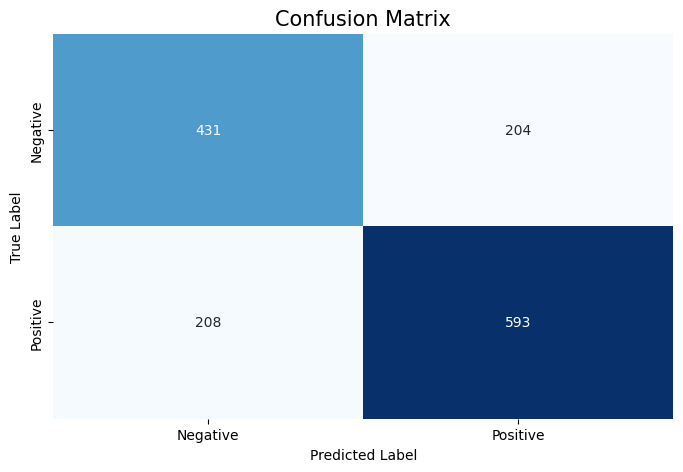

In [ ]:
## PIPELINE
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_pipe)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix',fontsize=15)
plt.show()

### Load Model

In [ ]:
from joblib import dump, load
dump(pipeline_svm, '/content/drive/MyDrive/SKRIPSI/svm_model.joblib')

['/content/drive/MyDrive/SKRIPSI/svm_model.joblib']

In [ ]:
load_model = load('/content/drive/MyDrive/SKRIPSI/svm_model.joblib')
y_pred = load_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, pred_pipe)
print("Accuracy:", svm_accuracy)
print("Accuracy:", round(svm_accuracy*100, 2))
print()

svm_precision = precision_score(y_test, pred_pipe)
print("Precision:", svm_precision)
print("Precision:", round(svm_precision*100,2))
print()

svm_recall = recall_score(y_test, pred_pipe)
print("Recall:", svm_recall)
print("Recall:", round(svm_recall*100,2))
print()

Accuracy: 0.713091922005571
Accuracy: 71.31

Precision: 0.7440401505646174
Precision: 74.4

Recall: 0.7403245942571786
Recall: 74.03



## NAIVE BAYES

### **TF-IDF** +1

In [ ]:
from sklearn.pipeline import Pipeline
pipeline_mnb = Pipeline([
    ('vect', CountVectorizer()),
    ('tf_idf', TfidfTransformer()),
    ('mnb_model', MultinomialNB())
])

X_train, X_test, y_train, y_test = train_test_split(df_merged['text'], df_merged['sentiment'], test_size=0.2, random_state=42)
pipeline_mnb.fit(X_train, y_train)
pred_pipe_mnb = pipeline_mnb.predict(X_test)

print(classification_report(y_test, pred_pipe_mnb))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       635
           1       0.71      0.80      0.75       801

    accuracy                           0.70      1436
   macro avg       0.70      0.69      0.69      1436
weighted avg       0.70      0.70      0.70      1436



In [ ]:
nb_accuracy = accuracy_score(y_test, pred_pipe_mnb)
print("Accuracy:", nb_accuracy)
print("Accuracy:", round(nb_accuracy*100, 2))
print()

nb_precision = precision_score(y_test, pred_pipe_mnb)
print("Precision:", nb_precision)
print("Precision:", round(nb_precision*100, 2))
print()

nb_recall = recall_score(y_test, pred_pipe_mnb)
print("Recall:", nb_recall)
print("Recall:", round(nb_recall*100, 2))
print()

Accuracy: 0.7047353760445683
Accuracy: 70.47

Precision: 0.7096774193548387
Precision: 70.97

Recall: 0.7965043695380774
Recall: 79.65



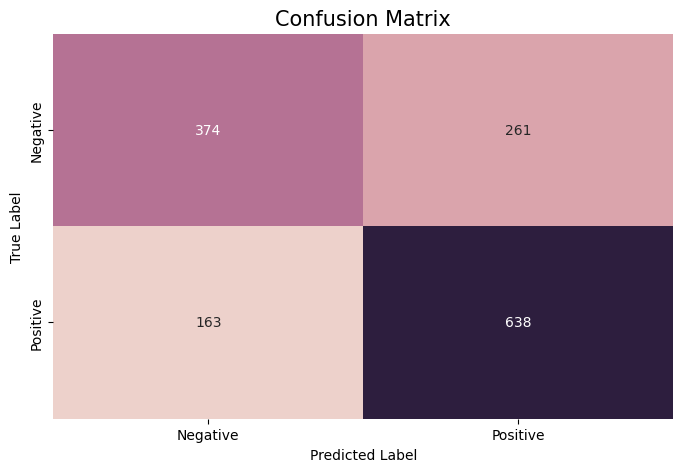

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_pipe_mnb)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix',fontsize=15)
plt.show()

- TP: 1090 (Top-left corner)
- TN: 250 (Bottom-right corner)
- FP: 68 (Top-right corner)
- FN: 549 (Bottom-left corner)

### Load Model

In [ ]:
from joblib import dump, load
dump(pipeline_mnb, '/content/drive/MyDrive/SKRIPSI/mnb_model.joblib')

['/content/drive/MyDrive/SKRIPSI/mnb_model.joblib']

In [ ]:
load_model = load('/content/drive/MyDrive/SKRIPSI/mnb_model.joblib')
y_pred = load_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_accuracy)
print("Accuracy:", round(nb_accuracy*100, 2))
print()

nb_precision = precision_score(y_test, y_pred)
print("Precision:", nb_precision)
print("Precision:", round(nb_precision*100, 2))
print()

nb_recall = recall_score(y_test, y_pred)
print("Recall:", nb_recall)
print("Recall:", round(nb_recall*100, 2))
print()

Accuracy: 0.7047353760445683
Accuracy: 70.47

Precision: 0.7096774193548387
Precision: 70.97

Recall: 0.7965043695380774
Recall: 79.65



## IndoBERT

Model: indobertv4

Optimizer: AdamW Lr: 2e-5

Acc-Pre-Rec: 69, 70, 70

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  print('there are %d GPU(s) available.' % torch.cuda.device_count())
  print('we will use the GPU: ', torch.cuda.get_device_name(0))
else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [ ]:
df_merged = df_merged.drop(columns=['original_text'])
df_merged = df_merged.rename(columns={'sentiment' : 'label'})
df_merged.head()

,text,label
0,orang orang tinggal perang gembira tinggal ras...,1
1,tangan kepal maju muka jaya pmii merdekamerdeka,1
2,mantap mahasiswa maju kasih ampun,1
3,hidup mahasiswa hidup buruh juang,1
4,request bbm sampah daun plastik minimal,1


In [ ]:
df_merged.shape

(7180, 2)

In [ ]:
text = df_merged['text'].values
labels = df_merged['label'].values

### Load Model

In [ ]:
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1', do_lower_case=True) #load model

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df_merged.head(3)

,text,label
0,orang orang tinggal perang gembira tinggal rasulullah suka jihad harta jiwa jalan allah quotjanganlah berangkat pergi perang panas terik api neraka jahannam panas at tawba,1
1,tangan kepal maju muka jaya pmii merdekamerdeka,1
2,mantap mahasiswa maju kasih ampun,1


In [ ]:
# test
print("Original: ", text[7155])
print("Tokenized: ", tokenizer.tokenize(text[7155]))
print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text[7155]))) #blm termasuk token cls dan sep
# ## tidak ada di dict maka ditambahkan tanda pagar setelah kata yang diketahuinya (kalau ditengah)

Original:  siksa rakyat indonesia indonesia malu berita sebar negeri dpr janji rakyat penuh petinggi rakyat indonesia hancur tolong rakyat indonesia wakil rakyat hormat juang juang lawan jajah jajah rakyat hormat salam indonesia
Tokenized:  ['siksa', 'rakyat', 'indonesia', 'indonesia', 'malu', 'berita', 'sebar', 'negeri', 'dpr', 'janji', 'rakyat', 'penuh', 'petinggi', 'rakyat', 'indonesia', 'hancur', 'tolong', 'rakyat', 'indonesia', 'wakil', 'rakyat', 'hormat', 'juang', 'juang', 'lawan', 'jaj', '##ah', 'jaj', '##ah', 'rakyat', 'hormat', 'salam', 'indonesia']
Token IDS:  [22060, 1829, 300, 300, 5535, 2140, 29912, 1202, 2441, 6370, 1829, 1876, 17210, 1829, 300, 7893, 3854, 1829, 300, 3022, 1829, 9674, 26440, 26440, 4031, 8617, 21, 8617, 21, 1829, 9674, 3595, 300]


In [ ]:
# disini baru ditambahkan cls + sep
input_ids = []

for sentence in text:
  encoded_sentences = tokenizer.encode(sentence, add_special_tokens = True)
  input_ids.append(encoded_sentences)

print("Original: ", text[7155])
print("Token IDs: ", input_ids[7155])

Original:  siksa rakyat indonesia indonesia malu berita sebar negeri dpr janji rakyat penuh petinggi rakyat indonesia hancur tolong rakyat indonesia wakil rakyat hormat juang juang lawan jajah jajah rakyat hormat salam indonesia
Token IDs:  [2, 22060, 1829, 300, 300, 5535, 2140, 29912, 1202, 2441, 6370, 1829, 1876, 17210, 1829, 300, 7893, 3854, 1829, 300, 3022, 1829, 9674, 26440, 26440, 4031, 8617, 21, 8617, 21, 1829, 9674, 3595, 300, 3]


In [ ]:
print("Max sentence length: ", max([len(sen) for sen in input_ids]))

Max sentence length:  463


In [ ]:
max_len = 64
print("Padding/truncating all sentences to %d values" % max_len)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=max_len, dtype='long', value=0, truncating='post', padding='post')

Padding/truncating all sentences to 64 values
Padding token: "[PAD]", ID: 0


In [ ]:
input_ids[7155]

array([    2, 22060,  1829,   300,   300,  5535,  2140, 29912,  1202,
        2441,  6370,  1829,  1876, 17210,  1829,   300,  7893,  3854,
        1829,   300,  3022,  1829,  9674, 26440, 26440,  4031,  8617,
          21,  8617,    21,  1829,  9674,  3595,   300,     3,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

In [ ]:
attention_mask = []

for sentence in input_ids:
  att_mask = [int(token_id > 0) for token_id in sentence]
  attention_mask.append(att_mask)
# intinya ngasih tau yang padding dan yang asli

### Split Data

In [ ]:
# training - testing
train_input, test_input, train_labels, test_labels = train_test_split(input_ids,
                                                                      labels,
                                                                      random_state=2017,
                                                                      test_size=0.2)
train_mask, test_mask, _, _ = train_test_split(attention_mask,
                                               labels,
                                               random_state=2017,
                                               test_size=0.2)

# validation
train_input, validation_input, train_labels, validation_labels = train_test_split(train_input,
                                                                                  train_labels,
                                                                                  random_state=2018,
                                                                                  test_size=0.1)
train_mask, validation_mask, _, _ = train_test_split(train_mask,
                                                     train_mask,
                                                     random_state=2018,
                                                     test_size=0.1)

In [ ]:
print("Train")
print("Input: ", train_input.shape)
print("Label: ", train_labels.shape)
print("Mask: ", np.array(train_mask).shape)
print()
print("Validation")
print("Input: ", validation_input.shape)
print("Label: ", validation_labels.shape)
print("Mask: ", np.array(validation_mask).shape)
print()
print("Test")
print("Input: ", test_input.shape)
print("Label: ", test_labels.shape)
print("Mask: ", np.array(test_mask).shape)

Train
Input:  (5169, 64)
Label:  (5169,)
Mask:  (5169, 64)

Validation
Input:  (575, 64)
Label:  (575,)
Mask:  (575, 64)

Test
Input:  (1436, 64)
Label:  (1436,)
Mask:  (1436, 64)


In [ ]:
type(train_input)

numpy.ndarray

In [ ]:
train_input = torch.tensor(train_input)
train_labels = torch.tensor(train_labels)
train_mask = torch.tensor(train_mask)

validation_input = torch.tensor(validation_input)
validation_labels = torch.tensor(validation_labels)
validation_mask = torch.tensor(validation_mask)

test_input = torch.tensor(test_input)
test_labels = torch.tensor(test_labels)
test_mask = torch.tensor(test_mask)

In [ ]:
import pickle

def save_tokenized_data(input_ids, attention_mask, labels, filename):
    with open(filename, 'wb') as f:
        pickle.dump((input_ids, attention_mask, labels), f)

# Function to load tokenized data
def load_tokenized_data(filename):
    with open(filename, 'rb') as f:
        input_ids, attention_mask, labels = pickle.load(f)
    return input_ids, attention_mask, labels


save_tokenized_data(test_input, test_mask, test_labels, 'tokenized_test_data.pkl')



In [ ]:
batch_size = 32

train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_input, validation_mask, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input, test_mask, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
type(train_input)

### Model Pre-Trained

In [ ]:
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1",
                                                      num_labels=2,
                                                      output_attentions = False,
                                                      output_hidden_states = False)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.cuda()
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
params = list(model.named_parameters())

print("The IndoBERT model has {:} different named parameters.".format(len(params)))

print(" Embedding Layer ")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print(" First Transformers ")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print(" Output Layer ")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

The IndoBERT model has 201 different named parameters.
 Embedding Layer 
bert.embeddings.word_embeddings.weight                       (50000, 768)
bert.embeddings.position_embeddings.weight                     (512, 768)
bert.embeddings.token_type_embeddings.weight                     (2, 768)
bert.embeddings.LayerNorm.weight                                   (768,)
bert.embeddings.LayerNorm.bias                                     (768,)
 First Transformers 
bert.encoder.layer.0.attention.self.query.weight               (768, 768)
bert.encoder.layer.0.attention.self.query.bias                     (768,)
bert.encoder.layer.0.attention.self.key.weight                 (768, 768)
bert.encoder.layer.0.attention.self.key.bias                       (768,)
bert.encoder.layer.0.attention.self.value.weight               (768, 768)
bert.encoder.layer.0.attention.self.value.bias                     (768,)
bert.encoder.layer.0.attention.output.dense.weight             (768, 768)
bert.encoder.layer

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

In [ ]:
epochs = 5
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)

In [ ]:
def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
model.to(device)
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


loss_values = []

for epoch_i in range(0, epochs):

  #              Training

  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0

  model.train()

  for step, batch in enumerate(train_dataloader):

    if step % 40 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))

    batch = tuple(t.to(device) for t in batch)

    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)
    # b_input_ids, b_input_mask, b_labels = batch

    model.zero_grad()

    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

    loss = outputs[0]

    total_loss += loss.item()

    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)

  loss_values.append(avg_train_loss)

  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(time.time() - t0)))

  #             Validation

  print("Running Validation...")

  t0 = time.time()

  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy

    nb_eval_steps += 1

  print("   Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
  print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======= Epoch 1 / 5 =======
Training...
Batch    40 of   162.     Elapsed: 0:00:15
Batch    80 of   162.     Elapsed: 0:00:27
Batch   120 of   162.     Elapsed: 0:00:40
Batch   160 of   162.     Elapsed: 0:00:53
   Average training loss: 0.61
   Training epoch took: 0:00:54
Running Validation...
   Accuracy: 0.71
   Validation took: 0:00:02
======= Epoch 2 / 5 =======
Training...
Batch    40 of   162.     Elapsed: 0:00:14
Batch    80 of   162.     Elapsed: 0:00:27
Batch   120 of   162.     Elapsed: 0:00:41
Batch   160 of   162.     Elapsed: 0:00:54
   Average training loss: 0.49
   Training epoch took: 0:00:55
Running Validation...
   Accuracy: 0.70
   Validation took: 0:00:02
======= Epoch 3 / 5 =======
Training...
Batch    40 of   162.     Elapsed: 0:00:13
Batch    80 of   162.     Elapsed: 0:00:27
Batch   120 of   162.     Elapsed: 0:00:40
Batch   160 of   162.     Elapsed: 0:00:53
   Average training loss: 0.35
   Training epoch took: 0:00:54
Running Validation...
   Accuracy: 0.69

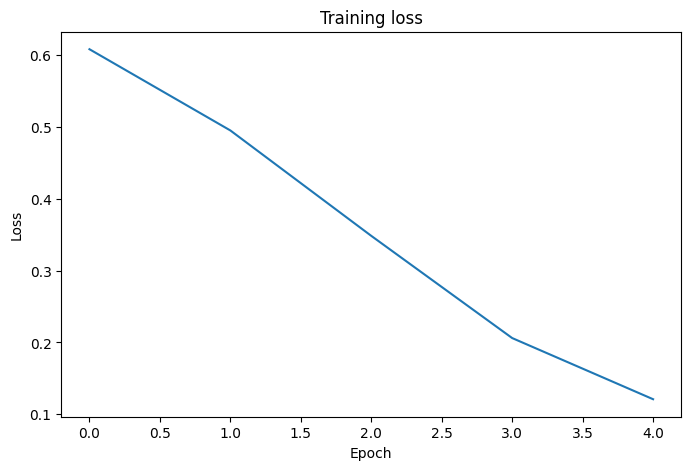

In [ ]:
# 2e-5 MAX LEN 64
plt.figure(figsize=(8,5))
plt.title("Training loss")
plt.plot(loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Model Evaluation

In [ ]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 1,436 test sentences
 DONE.


In [ ]:
flat_prediction = [item for sublist in prediction for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]

In [ ]:
idbert_acc = accuracy_score(flat_true_labels, flat_prediction)
idbert_precision = precision_score(flat_true_labels, flat_prediction)
idbert_recall = recall_score(flat_true_labels, flat_prediction)

print("Accuracy: %.2f" %idbert_acc)
print("Precision: %.2f" %idbert_precision)
print("Recall: %.2f" %idbert_recall)


Accuracy: 0.69
Precision: 0.71
Recall: 0.70


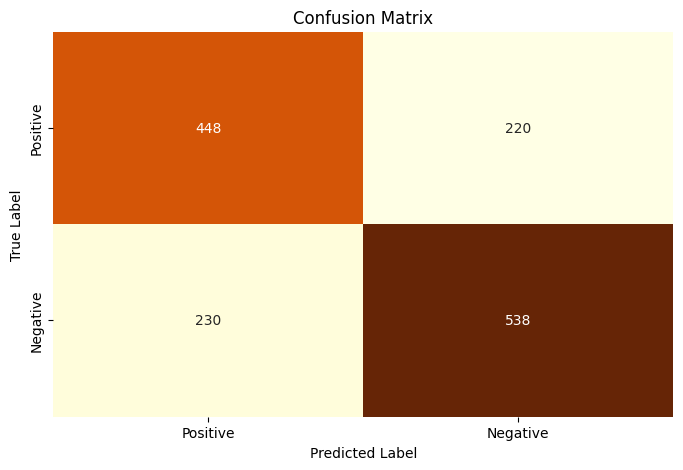

In [ ]:
flat_prediction = np.concatenate(prediction, axis=0)
flat_prediction = np.argmax(flat_prediction, axis=1)

flat_true_labels = np.concatenate(true_labels, axis=0)

cm = confusion_matrix(flat_true_labels, flat_prediction)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlOrBr", cbar=False,
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Model Saved

In [ ]:
torch.save(model.state_dict(), 'indobert_model_sentiment_v4.pth')


model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1",
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1', do_lower_case=True)

model.load_state_dict(torch.load('indobert_model_sentiment_v4.pth'))
model.eval()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

### Model and Tokenized Loaded

In [ ]:
test_input, test_mask, test_labels = load_tokenized_data('tokenized_test_data.pkl')

batch_size = 32
test_data = TensorDataset(torch.tensor(test_input), torch.tensor(test_mask), torch.tensor(test_labels))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1",
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.load_state_dict(torch.load('/content/drive/MyDrive/data/indobert_model_sentiment_v4.pth'))
model.eval()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
def evaluate_model(model, dataloader, device):
    predictions, true_labels = [], []

    for batch in dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        predictions.append(logits)
        true_labels.append(label_ids)

    flat_predictions = np.concatenate(predictions, axis=0)
    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    flat_true_labels = np.concatenate(true_labels, axis=0)

    accuracy = accuracy_score(flat_true_labels, flat_predictions)
    precision = precision_score(flat_true_labels, flat_predictions)
    recall = recall_score(flat_true_labels, flat_predictions)

    return accuracy, precision, recall

In [ ]:
model.to(device)
accuracy, precision, recall = evaluate_model(model, test_dataloader, device)

print("Accuracy: ",(accuracy))
print("Precision: ",(precision))
print("Recall: ",(recall))

Accuracy:  0.6866295264623955
Precision:  0.7097625329815304
Recall:  0.7005208333333334


In [ ]:
print("Accuracy:", round(accuracy*100, 2))
print("Precision:", round(precision*100, 2))
print("Recall:", round(recall*100, 2))

Accuracy: 68.66
Precision: 70.98
Recall: 70.05


# **Plot: Accuracy, Precision, Recall Comparison**

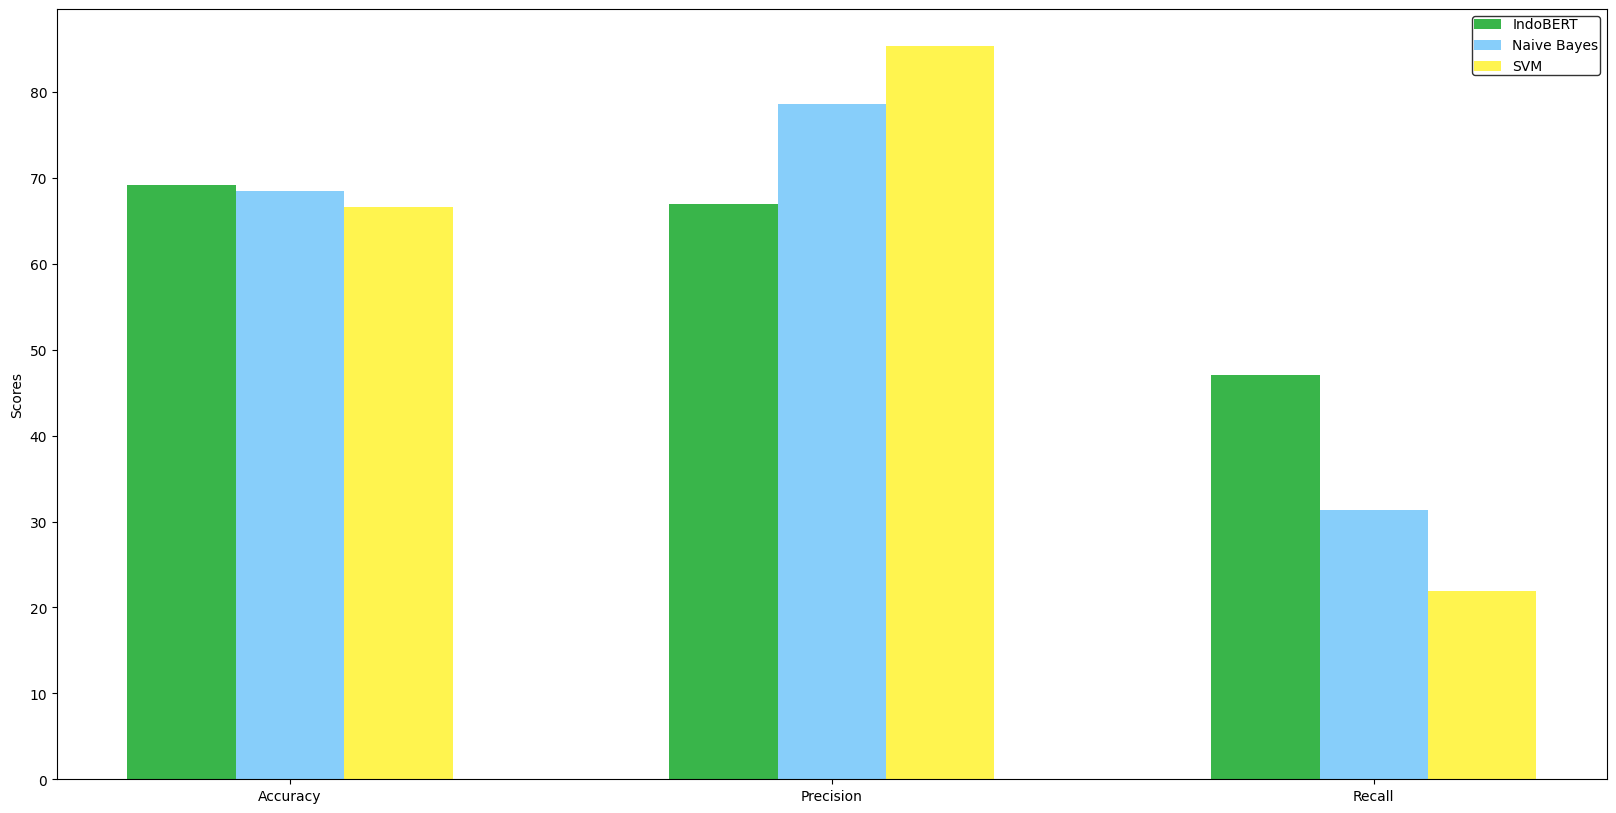

In [ ]:
x = np.arange(3)
indobert = [round(idbert_acc * 100, 2), round(idbert_precision * 100, 2), round(idbert_recall * 100, 2)]
nb = [round(nb_accuracy * 100, 2), round(nb_precision * 100, 2), round(nb_recall * 100, 2)]
svm = [round(svm_accuracy * 100, 2), round(svm_precision * 100, 2), round(svm_recall * 100, 2)]
width = 0.2

pastel_green = "#39b54a"
pastel_blue = "#87cefa"
pastel_yellow = "#fff44f"

fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(x - 0.2, indobert, width, color=pastel_green, label="IndoBERT")
ax.bar(x, nb, width, color=pastel_blue, label="Naive Bayes")
ax.bar(x + 0.2, svm, width, color=pastel_yellow, label="SVM")

ax.set_xticks(x)
ax.set_xticklabels(["Accuracy", "Precision", "Recall"])

ax.set_ylabel("Scores")


ax.legend(["IndoBERT", "Naive Bayes", "SVM"], loc=1,edgecolor="black", borderpad=0.1)

In [ ]:
models_performance = {
    'IndoBERT': {'accuracy': idbert_acc, 'precision': idbert_precision, 'recall': idbert_recall},
    'Naive Bayes': {'accuracy': nb_accuracy, 'precision': nb_precision, 'recall': nb_recall},
    'SVM': {'accuracy': svm_accuracy, 'precision': svm_precision, 'recall': svm_recall}
}

best_accuracy_values = None
best_precision_values = None
best_recall_values = None

for model_name, metrics in models_performance.items():
    if best_accuracy_values is None or metrics['accuracy'] > best_accuracy_values:
        best_accuracy_values = metrics['accuracy']
    if best_precision_values is None or metrics['precision'] > best_precision_values:
        best_precision_values = metrics['precision']
    if best_recall_values is None or metrics['recall'] > best_recall_values:
        best_recall_values = metrics['recall']

print("Best Accuracy Model:", best_accuracy_values)
print("Best Precision Model:", best_precision_values)
print("Best Recall Model:", best_recall_values)

Best Accuracy Model: 0.6918753193663771
Best Precision Model: 0.8536585365853658
Best Recall Model: 0.47095959595959597
